# Trial and Error

Just to try something out


-------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from sympy import sin, cos, tan, asin, acos, atan, pi, pprint, simplify
from IPython.display import display
import os
import scipy.integrate as integrate
import skinematics as skin

In [ ]:
#import sys
#sys.path

#import os
#os.environ["PATH"] += os.pathsep + r'E:\Programme\graphviz-2.38\release\bin'
#os.environ["PATH"]

In [ ]:
%run -i test_print

In [ ]:
from graphviz import Digraph

dot = Digraph(comment='The Round Table')
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

print(dot.source)
dot.render('round-table.gv', view=True)

In [35]:
d = {}

In [37]:
keys = ['subject01','RF','05','01']

In [54]:
try:
    if isinstance(d[keys[0]], dict):
        print('super')
        
except:
    d[keys[0]] = {}
    print('1st key added')

super
super


In [34]:
[*d2]

['b']

In [84]:
keys = ['subject01','RS','10','02']

In [79]:
if keys[0] not in d:
    d[keys[0]] = {}
    
if keys[1] not in d[keys[0]]:
    d[keys[0]][keys[1]] = {}
    
if keys[2] not in d[keys[0]][keys[1]]:
    d[keys[0]][keys[1]][keys[2]] = {}
    
if keys[3] not in d[keys[0]][keys[1]][keys[2]]:
    d[keys[0]][keys[1]][keys[2]][keys[3]] = {}

d

{'subject01': {'RF': {'05': {'01': {}}},
  'RS': {'05': {'01': {}}, '10': {'01': {}}}},
 'subject02': {'RS': {'10': {'01': {}}}},
 'subject03': {'RS': {'10': {'01': {}, '02': {}}}}}

In [86]:
[d[keys[0]]]

[{'RF': {'05': {'01': {}}}, 'RS': {'05': {'01': {}}, '10': {'01': {}}}}]

Function to design acceleration profiles:

In [101]:
# different slopes for time periods
#k = [5, 0, -5] # slopes
#tp = [0.1, 0.9, 1] # time periods


def f_acc(k,tp,t):
    tp = [0] + tp
    for ii in range(len(k)):
        if t <= tp[ii+1]:
            return k[ii]*(t - tp[ii]) + sum([k[jj]*(tp[jj+1]-tp[jj]) for jj in range(ii)])

In [102]:
# Just another example for an acceleration profile
k = [-1, 0, 3, 2, 1, 0, -1, -2, -3, -0.5, -1, 0, 1, 2, 0, -3]
tp = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.3, 1.5, 1.6, 1.7, 2, 2.2, 2.8]

tend = tp[-1] # end time of simulation

dt = 0.01  # simulation time step size

t_val =  np.arange(0,tend,dt) # time vector

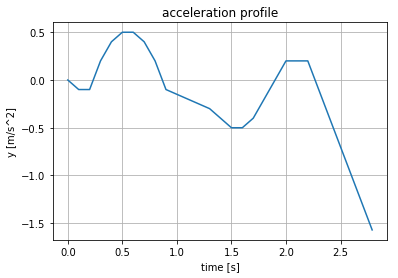

In [103]:
y_acc = [f_acc(k,tp,t_val[ii]) for ii in range(len(t_val))]
plt.plot(t_val,y_acc)
plt.grid(True)
plt.xlabel('time [s]')
plt.ylabel('y [m/s^2]')
plt.title('acceleration profile')

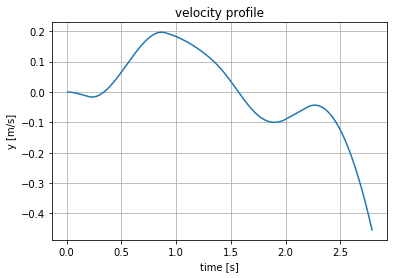

In [104]:
# first time integration --> velocity

y_vel = integrate.cumtrapz(y_acc, dx=dt)

plt.plot(t_val[1:],y_vel)
plt.grid(True)
plt.xlabel('time [s]')
plt.ylabel('y [m/s]')
plt.title('velocity profile')

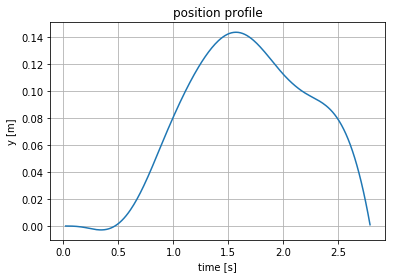

In [105]:
# second time integration --> position

y_pos = integrate.cumtrapz(y_vel, dx=dt)
start_height = 0
y_pos += start_height# add offset as start position

plt.plot(t_val[2:],y_pos)
plt.grid(True)
plt.xlabel('time [s]')
plt.ylabel('y [m]')
plt.title('position profile')

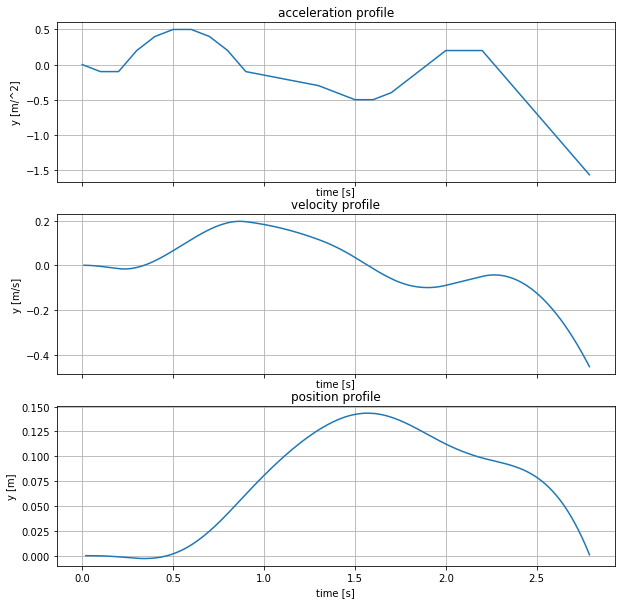

In [130]:
k = [-1, 0, 3, 2, 1, 0, -1, -2, -3, -0.5, -1, 0, 1, 2, 0, -3]
tp = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.3, 1.5, 1.6, 1.7, 2, 2.2, 2.8]

dt = 0.01  # simulation time step size
t_val =  np.arange(0,tp[-1],dt) # time vector

y_acc = [f_acc(k,tp,t_val[ii]) for ii in range(len(t_val))]
y_vel = integrate.cumtrapz(y_acc, dx=dt)
y_pos = integrate.cumtrapz(y_vel, dx=dt)

fig01, (ax01, ax02, ax03) = plt.subplots(nrows=3, figsize=(10, 10), sharex=True)

ax01.set_title('acceleration profile')
ax01.plot(t_val,y_acc)
ax01.set_xlabel('time [s]')
ax01.set_ylabel('y [m/^2]')
ax01.grid(True)

ax02.set_title('velocity profile')
ax02.plot(t_val[1:],y_vel)
ax02.set_xlabel('time [s]')
ax02.set_ylabel('y [m/s]')
ax02.grid(True)

ax03.set_title('position profile')
ax03.plot(t_val[2:],y_pos)
ax03.set_xlabel('time [s]')
ax03.set_ylabel('y [m]')
ax03.grid(True)

plt.show()

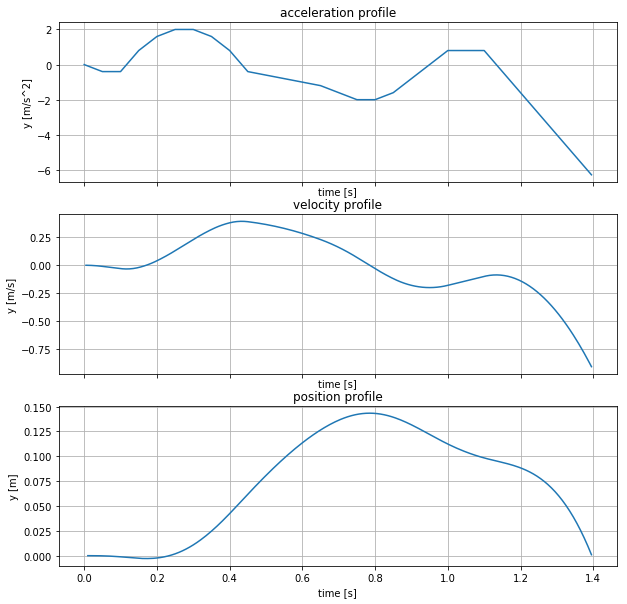

In [131]:
k = [-1, 0, 3, 2, 1, 0, -1, -2, -3, -0.5, -1, 0, 1, 2, 0, -3] # slopes
tp = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.3, 1.5, 1.6, 1.7, 2, 2.2, 2.8] # time points

dt = 0.01  # simulation time step size
t_val =  np.arange(0,tp[-1],dt) # time vector

# same acc. profile (same amplitudes) as before
y_acc = [f_acc(k,tp,t_val[ii]) for ii in range(len(t_val))]

# but now let us shorten the time
time_factor = 0.5
t_val_new = [x * time_factor for x in t_val]

# consequently, let us change the acc. profile in order to get the same position profile as before
y_acc[:] = [acc/time_factor**2 for acc in y_acc]

y_vel = integrate.cumtrapz(y_acc, dx= dt * time_factor)
y_pos = integrate.cumtrapz(y_vel, dx= dt * time_factor)


fig01, (ax01, ax02, ax03) = plt.subplots(nrows=3, figsize=(10, 10), sharex=True)

ax01.set_title('acceleration profile')
ax01.plot(t_val_new,y_acc)
ax01.set_xlabel('time [s]')
ax01.set_ylabel('y [m/s^2]')
ax01.grid(True)

ax02.set_title('velocity profile')
ax02.plot(t_val_new[1:],y_vel)
ax02.set_xlabel('time [s]')
ax02.set_ylabel('y [m/s]')
ax02.grid(True)

ax03.set_title('position profile')
ax03.plot(t_val_new[2:],y_pos)
ax03.set_xlabel('time [s]')
ax03.set_ylabel('y [m]')
ax03.grid(True)

plt.show()

## Generating Acceleration Profile for Testing

In [ ]:
g_mps2 = 9.80665 # [m/s^2]
sampling_rate = 100

acc_lin = np.zeros((10000,3))
vel_ang = np.zeros((10000,3))

In [ ]:
# let's set the x-component of the linear acceleration to 1 m/s^2 for the first second
acc_lin[1:501,0] = 1/g_mps2 # m/s^2 --> g
acc_lin[3001:3501,0] = -1/g_mps2
time = np.arange(1000)/sampling_rate

# let's set the z-component to 1 g (upright position)
acc_lin[:,2] = 1 # g

# let's make some rotation (1 deg/s around z-axis after 1 s)
vel_ang[101:501,2] = 10

## Additional Staff - Trajectory

In [ ]:
array = np.array([1,1,1])
M1 = np.ones((3,3))
M2 = np.ones((3,3))
np.dot(M2, np.dot(M1, array))

In [ ]:
np.mean(sensor_data['Acc'][300:500], axis=0)

In [ ]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 3
fs = 256       # sample rate, Hz
cutoff = 50  # cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)


acc_filt = butter_lowpass_filter(sensor_data['Acc'], cutoff, fs, order)
gyr_filt = butter_lowpass_filter(sensor_data['Gyr'], cutoff, fs, order)

plt.plot(acc_filt);

In [ ]:
import pylab

class plotter:
    def __init__(self, initial_values):
        self.values = np.array(initial_values)
        self.fig = plt.figure(figsize=(12,8))

        self.ax1 = self.fig.add_subplot(211)
        self.ax2 = self.fig.add_subplot(212)
        self.draw()
        self.fig.canvas.mpl_connect('key_press_event',self.key)

    def draw(self):
        self.ax1.clear()
        self.ax1.plot(self.values)


    def key(self, event):
        if event.key=='right':
            self.values = self.values + 1
        elif event.key == 'left':
            self.values = self.values - 1

        self.draw()
        self.fig.canvas.draw()
        
%matplotlib auto
plot = plotter([1,2,4,8])

In [ ]:
def positionFigure(figure, geometry):
    '''Position one figure on a given location on the screen.
    This works for Tk and for Qt5 backends, but may fail on others.'''
    
    mgr = figure.canvas.manager
    (pos_x, pos_y, width, height) = geometry
    
    # positioning commands for Tk
    position = '{0}x{1}+{2}+{3}'.format(width, height, pos_x, pos_y)
    mgr.window.geometry(position)

In [ ]:
# Get the screen size
root = tk.Tk()
(screen_w, screen_h) = (root.winfo_screenwidth(), root.winfo_screenheight())
root.destroy()
(screen_w, screen_h)

In [ ]:
geometry = (0, 0, screen_w, screen_h)
positionFigure(fig, geometry)

In [36]:
data = 33
dictionary = {}
file_name_split = ['subject01','RA','05','01']

In [45]:
def nested_dict(dictionary ,file_name_split, data):
    
    # check if there is still a key
    if file_name_split:

        key = file_name_split[0] # get current key for dictionary
        file_name_split.pop(0) # remove first element
        
        d[key] = {}
        d[key] = nested_dict(dictionary[key], file_name_split[:], data)
    
    else:
        return data
        
    
    

In [47]:
a = nested_dict(dictionary ,file_name_split[:], data)
a

In [44]:
file_name_split

['subject01', 'RA', '05', '01']

In [28]:
dictionary = {}
dictionary['a'] = {}
dictionary['a']['b'] = 3
dictionary

{'a': {'b': 3}}